# Testing Snowplow Algorithm

In [131]:
import os
# switch directories for import
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import initialize
import params
from sectioning_streets import sectioning
from importlib import reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autoreload documentation: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html

For reloading user modules

In [132]:
toyEdgeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\edges.csv"
toyNodeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\nodes.csv"

In [133]:
instance = "smallstreets"
polygon_path = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Data+Info\\GIS Data\\IndividualRoutes\\MiddletonRoute3-blue.gpkg"

match instance:
    case "smallstreets":
        G = initialize.create_small_streets()
    case "fullstreets":
        G = initialize.create_full_streets()
    case "smalltoy":
        G = initialize.create_small_toy(toyEdgeFile, toyNodeFile)
    case "sectionedfullstreets":
        G = sectioning.section_component(polygon_path)
    case _:
        print("Invalid instance name")
     

Update depot

In [134]:
params.DEPOT = 0
params.DEPOT

0

Now reload all other modules for updated depot

In [135]:
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import dual_graphs
import pandas as pd
import construction
import shortest_paths
import crossover
import osmnx as ox
import genetic 
import solution 
import costs 
import plotting
import local_search
%load_ext autoreload
%autoreload 2

dual_graphs = reload(dual_graphs)
construction = reload(construction)
shortest_paths = reload(shortest_paths)
crossover = reload(crossover)
genetic = reload(genetic)
solution = reload(solution)
costs = reload(costs)
plotting = reload(plotting)
local_search = reload(local_search)

from shortest_paths import ShortestPaths
from crossover import apply_crossover
from genetic import run_genetic
from solution import Solution
from routes_representations import RouteStep
from costs import routes_cost
from params import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
approach = "genetic"

if approach == "genetic":
    G = initialize.add_multi_edges(G)
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G)

elif approach == "annealing":
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G, False, True)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G, False, True)



In [137]:
print(G)
print(G_DUAL)

MultiDiGraph with 51 nodes and 142 edges
MultiDiGraph with 143 nodes and 469 edges


In [138]:
sp = ShortestPaths(G_DUAL, False, True)

In [139]:
construction.process_node(G, 0, 1)

([(1,
   44,
   0,
   {'osmid': 758477398,
    'oneway': True,
    'highway': 'motorway_link',
    'reversed': False,
    'length': 14.069,
    'speed_kph': 44.3,
    'travel_time': 1.1,
    'priority': 3,
    'passes_rem': 2.0,
    'salt_per': 2.0,
    'serviced': False,
    'deadheading_passes': 0,
    'geometry': <LINESTRING (-89.514 43.097, -89.514 43.097)>}),
  (1,
   44,
   1,
   {'osmid': 758477398,
    'oneway': True,
    'highway': 'motorway_link',
    'reversed': False,
    'length': 14.069,
    'speed_kph': 44.3,
    'travel_time': 1.1,
    'priority': 3,
    'passes_rem': 2.0,
    'salt_per': 2.0,
    'serviced': False,
    'deadheading_passes': 0,
    'geometry': <LINESTRING (-89.514 43.097, -89.514 43.097)>})],
 4.1,
 4.1)

In [140]:
r, rreq = construction.route_generation(G, sp)


In [141]:
for route in r:
    for routestep in route:
        print(routestep)
    print("***")


0 --> 41. (0) Salt value: 20000. Prev: None. Next: (41, 1, 1). Route end: False
41 --> 1. (1) Salt value: 19998.0. Prev: (0, 41, 0). Next: (1, 44, 0). Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (41, 1, 1). Next: (44, 0, 1). Route end: False
44 --> 0. (1) Salt value: 19993.0. Prev: (1, 44, 0). Next: (0, 41, 1). Route end: False
***
0 --> 41. (1) Salt value: 20000. Prev: (44, 0, 1). Next: (41, 1, 0). Route end: False
41 --> 1. (0) Salt value: 19998.0. Prev: (0, 41, 1). Next: (1, 44, 1). Route end: False
1 --> 44. (1) Salt value: 19995.0. Prev: (41, 1, 0). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 1). Next: (45, 46, 0). Route end: False
45 --> 46. (0) Salt value: 19992.0. Prev: (44, 45, 0). Next: (46, 11, 0). Route end: False
46 --> 11. (0) Salt value: 19991.0. Prev: (45, 46, 0). Next: (11, 53, 0). Route end: False
11 --> 53. (0) Salt value: 19990.0. Prev: (46, 11, 0). Next: (53, 14, 1). Route end: False
53 --> 14. (1) Salt value:

In [142]:
for route in rreq:
    for routestep in route:
        print(routestep)
    print("**")

0 --> 41. (0) Salt value: 20000. Prev: None. Next: (41, 1, 1). Route end: False
41 --> 1. (1) Salt value: 19998.0. Prev: (0, 41, 0). Next: (1, 44, 0). Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (41, 1, 1). Next: (44, 0, 1). Route end: False
44 --> 0. (1) Salt value: 19993.0. Prev: (1, 44, 0). Next: (0, 41, 1). Route end: False
**
0 --> 41. (1) Salt value: 20000. Prev: (44, 0, 1). Next: (41, 1, 0). Route end: False
41 --> 1. (0) Salt value: 19998.0. Prev: (0, 41, 1). Next: (1, 44, 1). Route end: False
1 --> 44. (1) Salt value: 19995.0. Prev: (41, 1, 0). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 1). Next: (45, 46, 0). Route end: False
45 --> 46. (0) Salt value: 19992.0. Prev: (44, 45, 0). Next: (46, 11, 0). Route end: False
46 --> 11. (0) Salt value: 19991.0. Prev: (45, 46, 0). Next: (11, 53, 0). Route end: False
11 --> 53. (0) Salt value: 19990.0. Prev: (46, 11, 0). Next: (53, 14, 1). Route end: False
53 --> 14. (1) Salt value: 

Test Local Search

In [143]:
required_edges = set(edge[:3] for edge in G.edges(data=True, keys=True) if edge[3]['priority'] != 0)
S_first = Solution(rreq, dict(), routes_cost(G, sp, rreq), 0)

print(routes_cost(G, sp, S_first.routes))
for route in S_first.routes:
    for routestep in route:
        print(routestep)
    print("**")

41640.20000000001
0 --> 41. (0) Salt value: 20000. Prev: None. Next: (41, 1, 1). Route end: False
41 --> 1. (1) Salt value: 19998.0. Prev: (0, 41, 0). Next: (1, 44, 0). Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (41, 1, 1). Next: (44, 0, 1). Route end: False
44 --> 0. (1) Salt value: 19993.0. Prev: (1, 44, 0). Next: (0, 41, 1). Route end: False
**
0 --> 41. (1) Salt value: 20000. Prev: (44, 0, 1). Next: (41, 1, 0). Route end: False
41 --> 1. (0) Salt value: 19998.0. Prev: (0, 41, 1). Next: (1, 44, 1). Route end: False
1 --> 44. (1) Salt value: 19995.0. Prev: (41, 1, 0). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 1). Next: (45, 46, 0). Route end: False
45 --> 46. (0) Salt value: 19992.0. Prev: (44, 45, 0). Next: (46, 11, 0). Route end: False
46 --> 11. (0) Salt value: 19991.0. Prev: (45, 46, 0). Next: (11, 53, 0). Route end: False
11 --> 53. (0) Salt value: 19990.0. Prev: (46, 11, 0). Next: (53, 14, 1). Route end: False
53 --> 14

In [144]:
S_new = local_search.local_improve(S_first, G, sp, required_edges, K, threshold=1)
print(routes_cost(G, sp, S_new.routes))
for route in S_new.routes:
    for routestep in route:
        print(routestep)
    print("***")

78711.91999999998
0 --> 41. (1) Salt value: 20000. Prev: None. Next: (1, 44, 0). Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (0, 41, 1). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 0). Next: (46, 11, 0). Route end: False
46 --> 11. (0) Salt value: 19991.0. Prev: (44, 45, 0). Next: (11, 53, 0). Route end: False
11 --> 53. (0) Salt value: 19990.0. Prev: (46, 11, 0). Next: (53, 14, 1). Route end: False
53 --> 14. (1) Salt value: 19989.0. Prev: (11, 53, 0). Next: (14, 10, 0). Route end: False
14 --> 10. (0) Salt value: 19986.0. Prev: (53, 14, 1). Next: (10, 11, 0). Route end: False
10 --> 11. (0) Salt value: 19985.0. Prev: (14, 10, 0). Next: (11, 10, 0). Route end: False
11 --> 10. (0) Salt value: 19984.0. Prev: (10, 11, 0). Next: (9, 36, 0). Route end: False
9 --> 36. (0) Salt value: 19982.0. Prev: (11, 10, 0). Next: (49, 48, 0). Route end: False
49 --> 48. (0) Salt value: 19959.0. Prev: (9, 36, 0). Next: (21, 49, 0). Route end: Fals

In [145]:
for route in S_new.routes:
    for routestep in route:
        print(routestep)
    print("***")

0 --> 41. (1) Salt value: 20000. Prev: None. Next: (1, 44, 0). Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (0, 41, 1). Next: (44, 45, 0). Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 0). Next: (46, 11, 0). Route end: False
46 --> 11. (0) Salt value: 19991.0. Prev: (44, 45, 0). Next: (11, 53, 0). Route end: False
11 --> 53. (0) Salt value: 19990.0. Prev: (46, 11, 0). Next: (53, 14, 1). Route end: False
53 --> 14. (1) Salt value: 19989.0. Prev: (11, 53, 0). Next: (14, 10, 0). Route end: False
14 --> 10. (0) Salt value: 19986.0. Prev: (53, 14, 1). Next: (10, 11, 0). Route end: False
10 --> 11. (0) Salt value: 19985.0. Prev: (14, 10, 0). Next: (11, 10, 0). Route end: False
11 --> 10. (0) Salt value: 19984.0. Prev: (10, 11, 0). Next: (9, 36, 0). Route end: False
9 --> 36. (0) Salt value: 19982.0. Prev: (11, 10, 0). Next: (49, 48, 0). Route end: False
49 --> 48. (0) Salt value: 19959.0. Prev: (9, 36, 0). Next: (21, 49, 0). Route end: False
21 --> 49. (0) S

In [146]:
s1, s1req = construction.route_generation(G, sp)
S1 = Solution(s1req, dict(), routes_cost(G, sp, s1req), 0)
S1 = local_search.local_improve(S1, G, sp, required_edges, K, threshold=1)

s2, s2req = construction.route_generation(G, sp)
S2 = Solution(s2req, dict(), routes_cost(G, sp, s2req), 0)
S2 = local_search.local_improve(S2, G, sp, required_edges, K, threshold=1)

In [147]:
S1.routes

[[0 --> 41. (1) Salt value: 20000. Prev: None. Next: (1, 44, 0). Route end: False,
  1 --> 44. (0) Salt value: 19995.0. Prev: (0, 41, 1). Next: (44, 0, 1). Route end: False,
  44 --> 0. (1) Salt value: 19993.0. Prev: (1, 44, 0). Next: (0, 41, 0). Route end: False,
  0 --> 41. (0) Salt value: 20000. Prev: (44, 0, 1). Next: (44, 0, 0). Route end: False,
  44 --> 0. (0) Salt value: 19993.0. Prev: (0, 41, 0). Next: (42, 41, 1). Route end: True],
 [42 --> 41. (1) Salt value: 20000. Prev: (44, 0, 0). Next: (1, 44, 1). Route end: False,
  1 --> 44. (1) Salt value: 19995.0. Prev: (42, 41, 1). Next: (41, 1, 1). Route end: False,
  41 --> 1. (1) Salt value: 19998.0. Prev: (1, 44, 1). Next: (41, 1, 0). Route end: False,
  41 --> 1. (0) Salt value: 19998.0. Prev: (41, 1, 1). Next: (53, 14, 0). Route end: True],
 [53 --> 14. (0) Salt value: 19972.0. Prev: (41, 1, 0). Next: (51, 22, 0). Route end: False,
  51 --> 22. (0) Salt value: 19999.0. Prev: (53, 14, 0). Next: (22, 48, 0). Route end: False,
  

In [148]:
apply_crossover(G, sp, S1.routes, S2.routes)

Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0
Duplicate found in 2th route, removed index was 0


[[44 --> 0. (0) Salt value: 0. Prev: None. Next: None. Route end: False,
  0 --> 41. (1) Salt value: 20000. Prev: (44, 0, 0). Next: (44, 0, 1). Route end: False,
  1 --> 44. (0) Salt value: 0. Prev: None. Next: None. Route end: False,
  44 --> 0. (1) Salt value: 19993.0. Prev: (0, 41, 1). Next: (0, 20, 0). Route end: False,
  0 --> 41. (0) Salt value: 0. Prev: None. Next: None. Route end: False,
  0 --> 20. (0) Salt value: 20000. Prev: (44, 0, 1). Next: (51, 13, 0). Route end: False,
  51 --> 13. (0) Salt value: 19984.0. Prev: (0, 20, 0). Next: (13, 30, 0). Route end: False,
  13 --> 30. (0) Salt value: 19953.0. Prev: (51, 13, 0). Next: (30, 48, 0). Route end: False,
  30 --> 48. (0) Salt value: 19952.0. Prev: (13, 30, 0). Next: (48, 30, 0). Route end: False,
  48 --> 30. (0) Salt value: 19955.0. Prev: (30, 48, 0). Next: (30, 13, 0). Route end: False,
  30 --> 13. (0) Salt value: 19954.0. Prev: (48, 30, 0). Next: (13, 51, 0). Route end: False,
  13 --> 51. (0) Salt value: 19983.0. Prev

In [149]:
# 4. Route Improvement Algorithms
sol = run_genetic(G, sp)

for route in sol.routes:
    for edge in route:
        print(edge)
    print("***")

initial generation 0
initial generation 1
initial generation 2
initial generation 3
initial generation 4
initial generation 5
initial generation 6
initial generation 7
initial generation 8
initial generation 9
Iteration 0
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route, removed index was 2
Duplicate found in 2th route

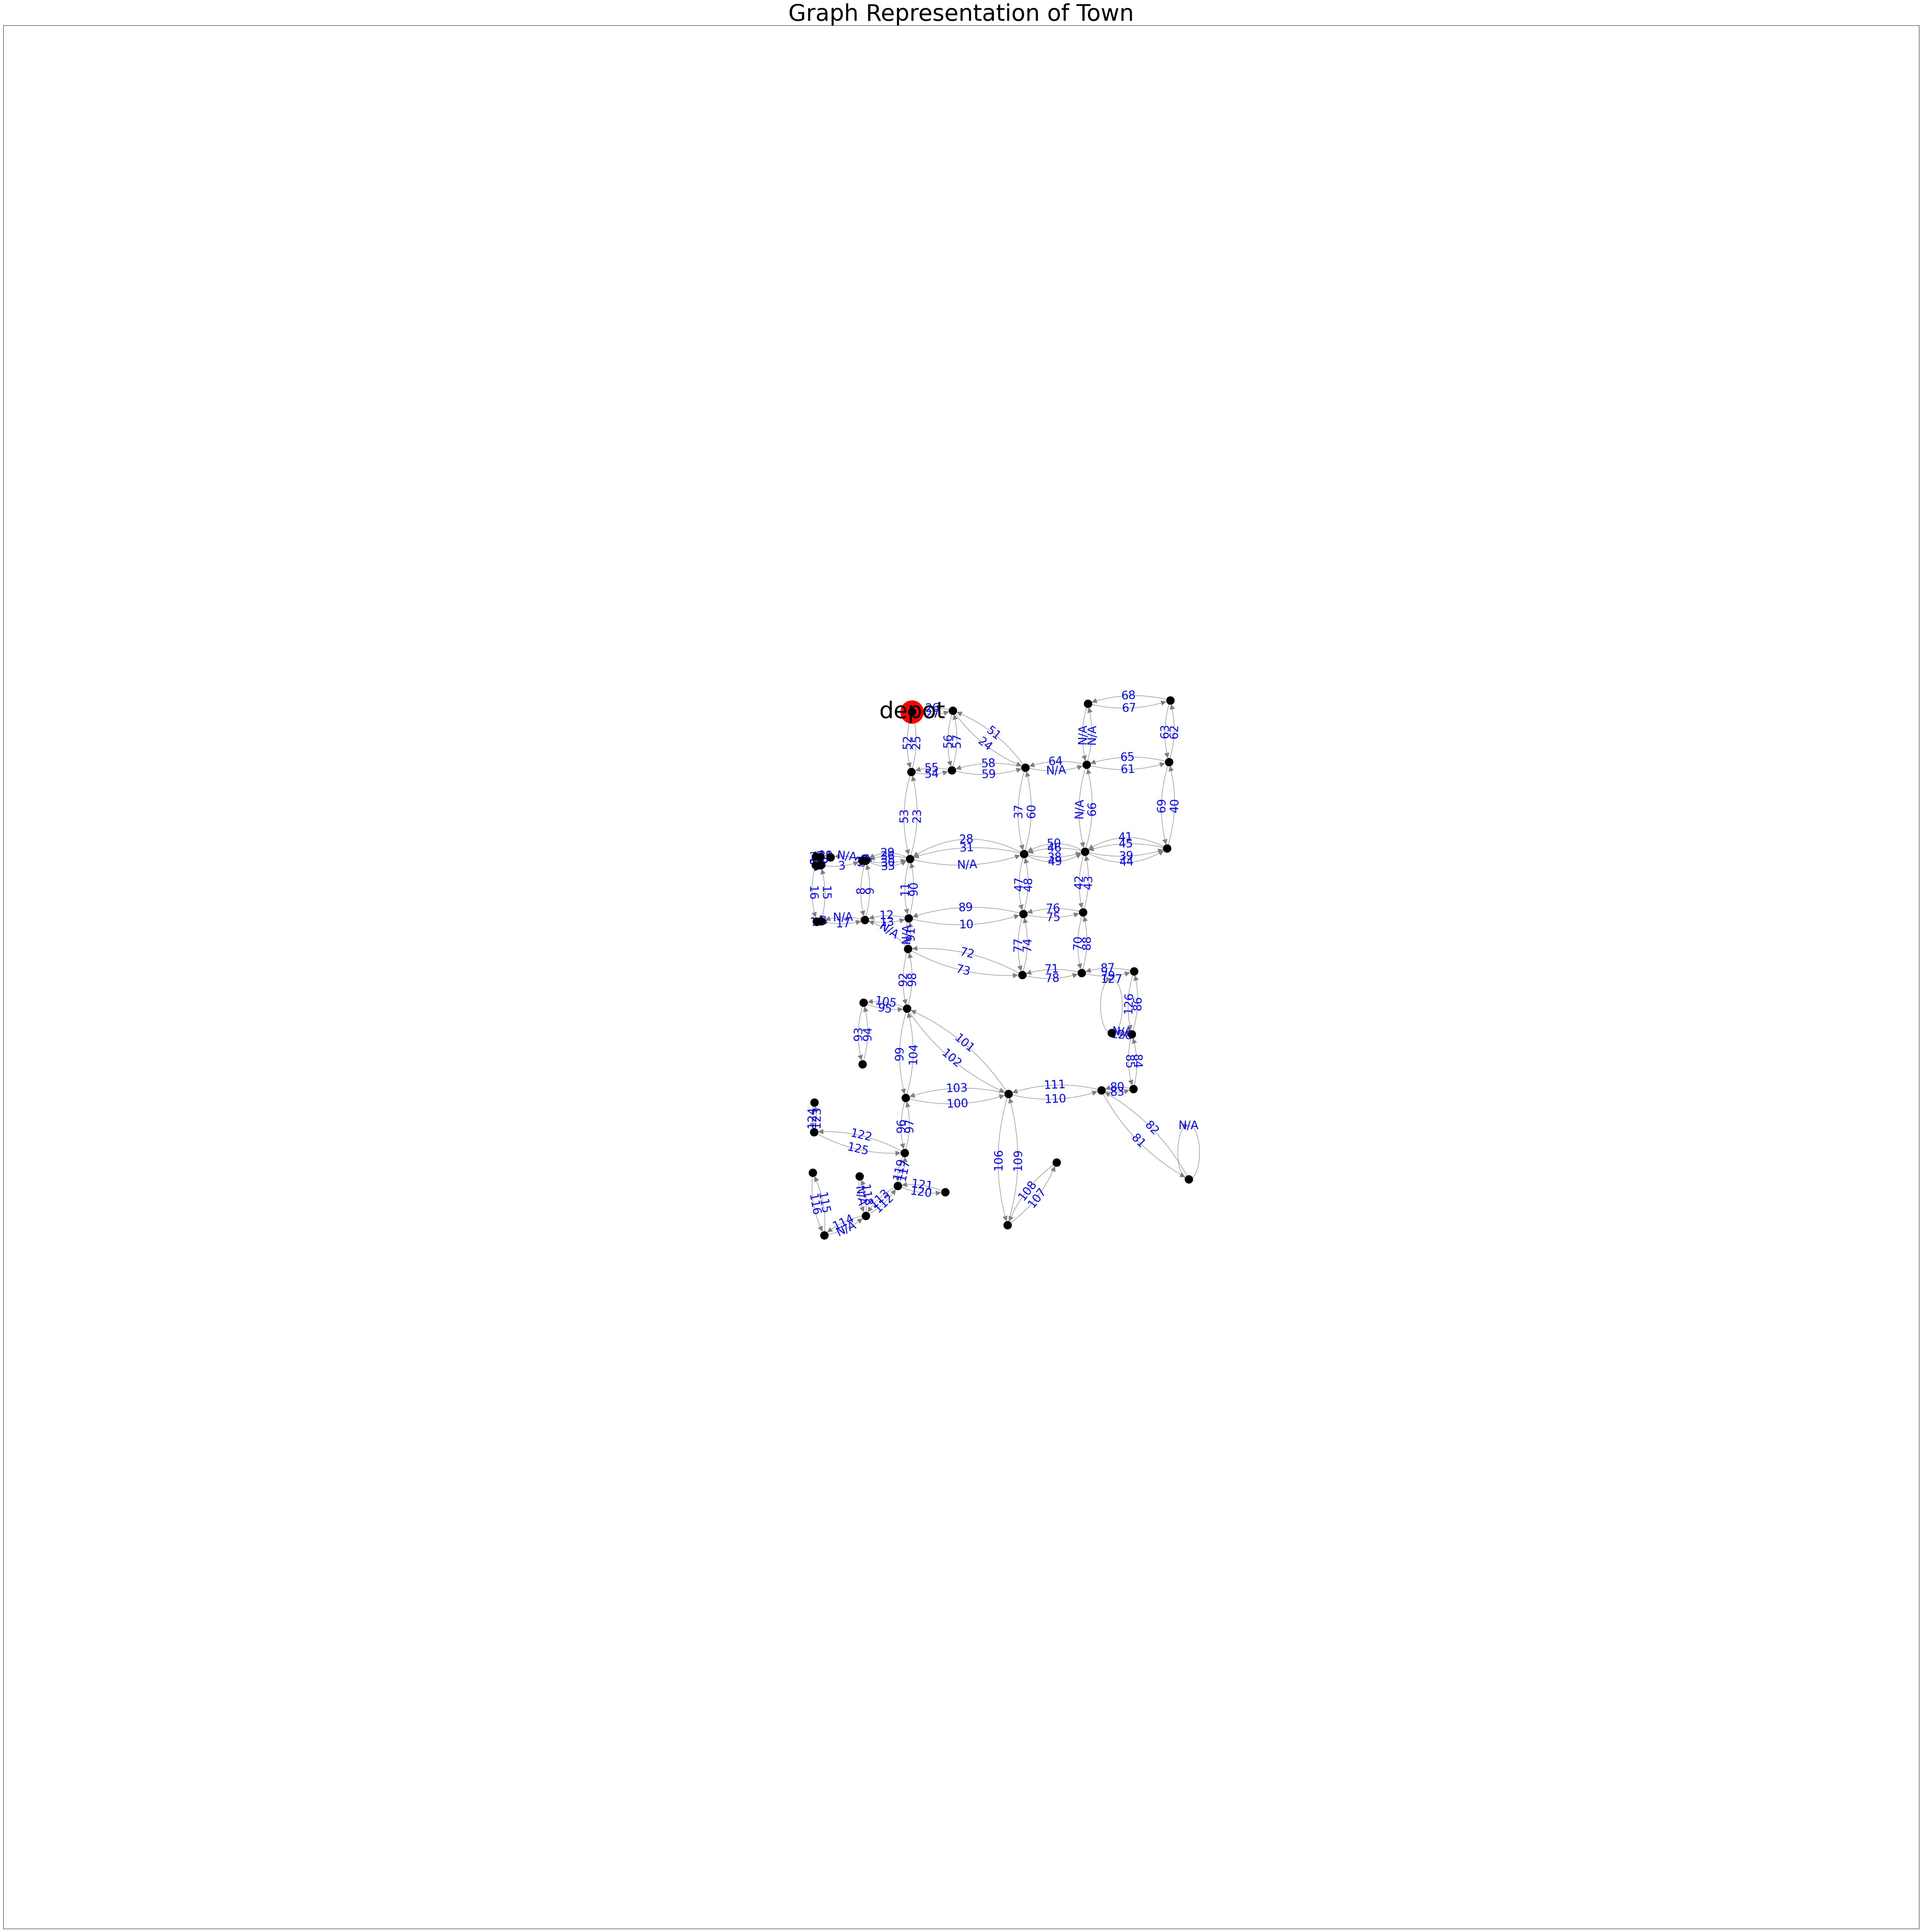

DONE
Routes cost 41972.36000000001


In [150]:

# 5. Plot final routes
G_graph = plotting.add_order_attribute(G, sol.routes)
plotting.draw_labeled_multigraph(G_graph, 'order', size=(75,75), plotDepot=True)

print("DONE")
print("Routes cost", sol.cost)

## Plot the routes using Folium

In [151]:
import folium

In [152]:
def full_routes(sp: ShortestPaths, routes: list[list[RouteStep]]):
    full_route = list()
    for i in range(len(routes)):
        for j in range(len(routes[i])):
            step = routes[i][j]
            next_step = routes[i][j+1] if j+1 < len(routes[i]) else routes[i+1][0] if i+1 < len(routes) else None
            if next_step is not None:
                if step.node2 == next_step.node1:
                    full_route.append(step.get_edge())
                else:
                    path = sp.get_shortest_path(step.get_edge(), next_step.get_edge())
                    full_route.extend(path)
                    full_route.pop()
            else:
                full_route.append(step.get_edge())
    return full_route

In [153]:
full_route = full_routes(sp, sol.routes)
full_route

[(0, 41, 1),
 (41, 1, 1),
 (1, 44, 0),
 (44, 0, 0),
 (0, 0, 0),
 (0, 41, 0),
 (41, 1, 0),
 (1, 44, 0),
 (44, 0, 0),
 (0, 20, 0),
 (20, 42, 0),
 (42, 41, 0),
 (41, 1, 0),
 (1, 44, 0),
 (44, 0, 0),
 (0, 0, 0),
 (0, 41, 0),
 (41, 1, 0),
 (1, 44, 0),
 (44, 0, 0),
 (0, 0, 0),
 (0, 41, 0),
 (41, 1, 0),
 (1, 44, 1),
 (44, 0, 0),
 (0, 20, 0),
 (20, 53, 0),
 (53, 11, 0),
 (11, 53, 0),
 (53, 14, 0),
 (14, 10, 0),
 (10, 9, 0),
 (9, 33, 0),
 (33, 14, 0),
 (14, 10, 0),
 (10, 11, 0),
 (11, 10, 0),
 (10, 11, 0),
 (11, 46, 0),
 (46, 45, 0),
 (45, 46, 0),
 (46, 0, 0),
 (0, 41, 0),
 (41, 1, 0),
 (1, 44, 0),
 (44, 45, 0),
 (45, 46, 0),
 (46, 11, 0),
 (11, 46, 0),
 (46, 45, 0),
 (45, 46, 0),
 (46, 11, 0),
 (11, 53, 0),
 (53, 20, 0),
 (20, 42, 0),
 (42, 41, 1),
 (41, 1, 0),
 (1, 44, 0),
 (44, 0, 1),
 (0, 20, 0),
 (20, 42, 0),
 (42, 41, 0),
 (41, 1, 0),
 (1, 44, 0),
 (44, 0, 0),
 (0, 20, 0),
 (20, 53, 0),
 (53, 14, 0),
 (14, 51, 0),
 (51, 13, 0),
 (13, 30, 0),
 (30, 48, 0),
 (48, 22, 0),
 (22, 51, 0),
 (51,

In [154]:
m = ox.graph_to_gdfs(G, nodes=False).explore()
m

In [155]:
m.get_bounds()
import folium.plugins


In [156]:
def number_DivIcon(color,number):
    """ Create a 'numbered' icon
    
    """
    icon = folium.DivIcon(
            icon_size=(1,1),
            icon_anchor=(14,40),
#             html='<div style="font-size: 18pt; align:center, color : black">' + '{:02d}'.format(num+1) + '</div>',
            html=f"""<span class="fa-stack" style="font-size: 12pt text-align:center" >
                    <!-- The icon that will wrap the number -->
                    <!-- a strong element with the custom content, in this case a number -->
                    <strong class="fa-stack-1x">
                         {number}  
                    </strong>
                </span>"""
        )
    return icon
blue_hex = "#3186cc"
red_hex = "#FF0000"
new_m = folium.Map(location=[43.1, -89.5], zoom_start=12)
count = 0
for i, edge in enumerate(full_route):
    edge_data = G.get_edge_data(edge[0], edge[1], edge[2])
        
    if edge_data is not None:
            
        if i < len(full_route)-1:
            edge_data_next = G.get_edge_data(full_route[i+1][0], full_route[i+1][1], full_route[i+1][2])
            if edge_data_next is not None and "name" in edge_data_next and "name" in edge_data:
                if edge_data_next["name"] == edge_data["name"]:
                    continue
        lstring = edge_data['geometry']
        # swap long lat to lat long
        lstring = lstring.__class__([(y, x) for x, y in lstring.coords])
        midpoint = len(list(lstring.coords))//2
        icon_number = folium.plugins.BeautifyIcon(
            border_color="#00ABDC",
            border_width=1,
            text_color="#00ABDC",
            number=count,
            inner_icon_style="margin-top:2;",
        )
        folium.PolyLine(locations=lstring.coords, color='red', weight=1).add_to(new_m)
        folium.Marker(location=lstring.coords[midpoint], popup=f"Edge {count}", icon=icon_number).add_to(new_m)

        # folium.Marker(location=lstring.coords[midpoint], popup=f"Edge {count}", icon=folium.Icon(color="white", icon_color="white")).add_to(new_m)
        # folium.Marker(location=lstring.coords[midpoint], popup=f"Edge {count}", icon=number_DivIcon(red_hex, count)).add_to(new_m)
        count += 1
new_m